In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [4]:
df=pd.read_csv("./datasets/concrete_data.csv")

In [5]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
958,259.9,100.6,78.4,170.6,10.4,935.7,762.9,28,49.77
311,295.7,0.0,95.6,171.5,8.9,955.1,859.2,28,39.94
608,236.0,0.0,0.0,194.0,0.0,968.0,885.0,90,21.95
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
986,272.8,105.1,81.8,209.7,9.0,904.0,679.7,28,37.17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Split the data

In [24]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:8],df.iloc[:,8:9])

In [73]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((772, 8), (258, 8), (772, 1), (258, 1))

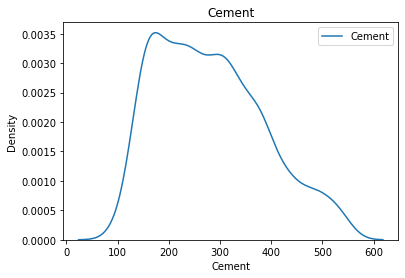

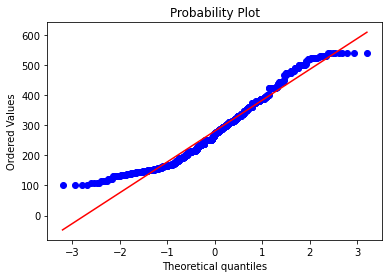

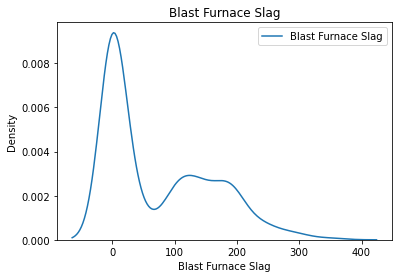

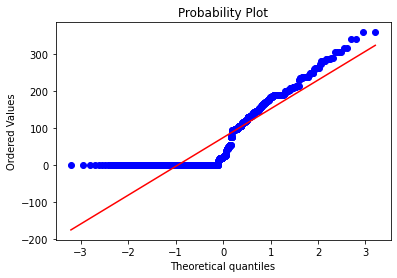

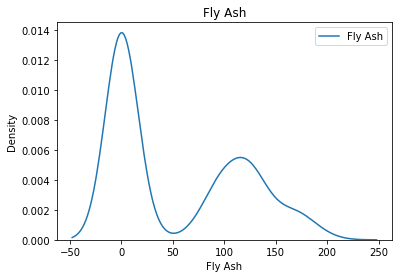

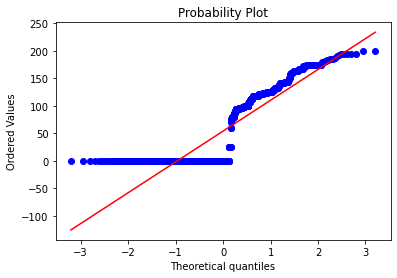

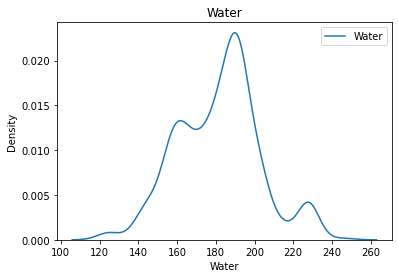

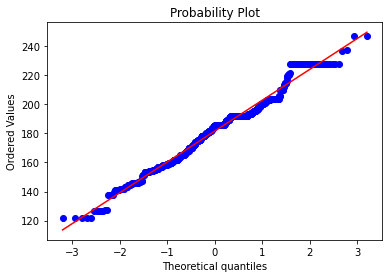

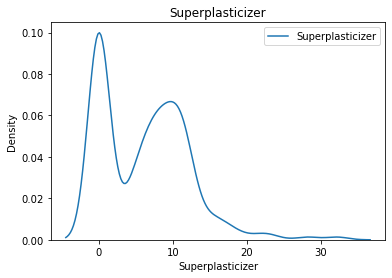

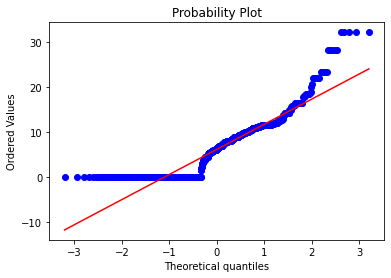

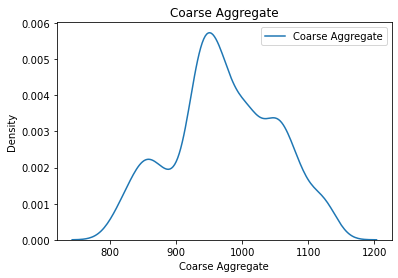

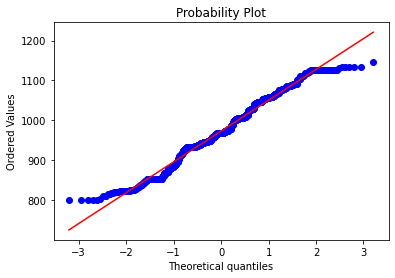

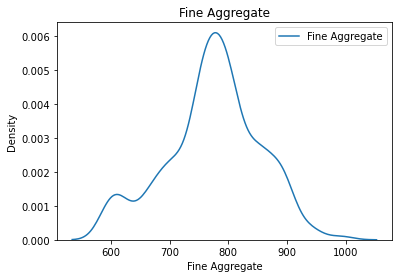

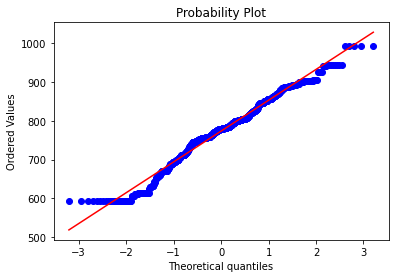

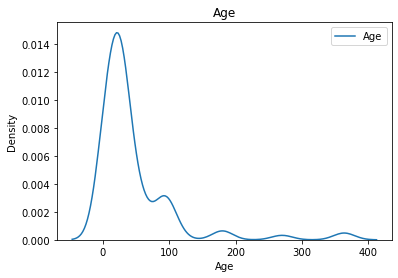

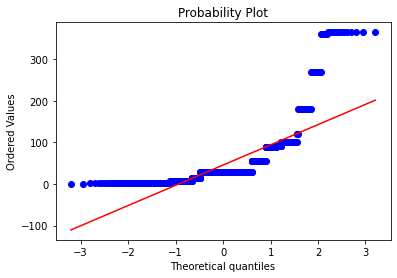

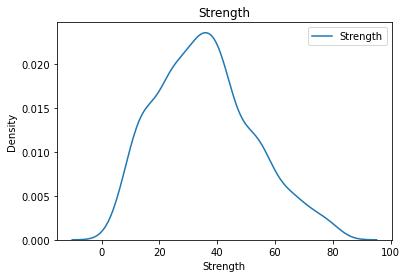

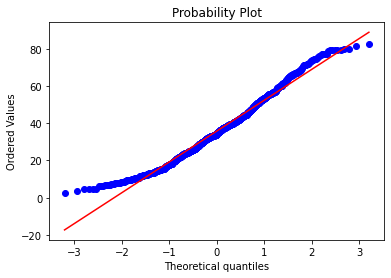

In [19]:
for col in df.columns:
    plt.title(col)
    sns.kdeplot(df[col],label=col)
    plt.legend()
    plt.show()
    plt.title("QQ plot of")
    stat.probplot(df[col],dist="norm",plot=plt)
    plt.show()
    

Blast Furnace Slag, Fly Ash, Superplasticizer, and has not the Normal Distribution

# PowerTransformer by box-cox

In [22]:
pt=PowerTransformer(method='box-cox')

In [27]:
pt.fit(X_train+0.00001)

PowerTransformer(method='box-cox')

In [32]:
X_train_transform=pt.transform(X_train+0.00001)
X_test_transform=pt.transform(X_test+0.00001)

# Train_Without PowerTransformation

In [35]:
lr=LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=lr.predict(X_test)

# Accuracy without PowerTransformation

In [47]:
cross_val_score(lr,X_train,y_train,cv=10).mean()

0.5685488510201959

In [56]:
r2_score(y_test,y_pred)

0.6481448863884299

In [58]:
mean_squared_error(y_test,y_pred)

111.88661294615088

# watch the data after the powerTransformation

In [59]:
X_train=pd.DataFrame(X_train_transform,columns=X_train.columns)
X_test=pd.DataFrame(X_test_transform,columns=X_train.columns)

In [60]:
X_train.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
364,0.488592,1.179876,-6.109846,-0.300171,0.704128,0.950381,-1.886532,0.114058
559,-1.147146,0.603840,1.169372,-2.949806,0.427234,1.109571,0.054353,0.709614
394,-1.162288,0.783549,1.173304,-0.850745,0.644751,0.421894,-0.071454,-0.468975
598,-0.101814,-3.041969,1.102291,0.518297,0.438407,0.906001,-0.267565,1.217612
567,-0.101814,-3.041969,1.102291,0.312896,0.438407,0.702379,-0.225641,0.114058


In [61]:
X_test.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
22,1.330100,0.891121,-6.109846,-1.360789,1.201668,-1.560567,1.481477,1.134367
64,0.783219,-3.041969,-6.109846,0.476366,-2.171800,1.073077,0.425256,0.114058
257,0.156555,0.921381,1.046873,0.429727,0.562187,-0.378363,-1.302838,0.114058
172,0.223490,0.929386,-6.109846,-0.658320,0.562187,-0.067667,0.231392,0.114058
162,-0.823378,-3.041969,1.114439,-0.942501,0.635944,1.535582,0.360310,0.709614


In [63]:
np.round(X_train.describe(),1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,772.0,772.0,772.0,772.0,772.0,772.0,772.0,772.0
mean,-0.0,-0.9,-2.8,-0.0,-0.4,-0.0,-0.0,-0.0
std,1.0,2.0,3.6,1.0,1.4,1.0,1.0,1.0
min,-2.4,-3.0,-6.1,-2.9,-2.2,-2.2,-2.1,-2.6
25%,-0.8,-3.0,-6.1,-0.8,-2.2,-0.6,-0.6,-1.0
50%,-0.0,0.4,-6.1,0.2,0.5,-0.1,0.0,0.1
75%,0.7,1.0,1.1,0.5,0.8,0.7,0.6,0.7
max,2.0,1.3,1.2,3.0,1.8,2.3,3.0,2.4


In [64]:
np.round(X_test.describe(),1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,258.0,258.0,258.0,258.0,258.0,258.0,258.0,258.0
mean,0.1,-0.9,-2.9,-0.1,-0.2,-0.0,0.1,-0.0
std,1.0,2.0,3.6,1.0,1.4,1.0,1.0,1.0
min,-2.4,-3.0,-6.1,-2.9,-2.2,-2.2,-2.1,-2.6
25%,-0.6,-3.0,-6.1,-0.8,-2.2,-0.7,-0.5,-0.5
50%,0.2,0.4,-6.1,0.0,0.5,-0.1,0.1,0.1
75%,0.9,1.0,1.1,0.5,0.9,0.8,0.7,0.7
max,2.0,1.2,1.2,3.0,1.8,2.1,3.0,2.4


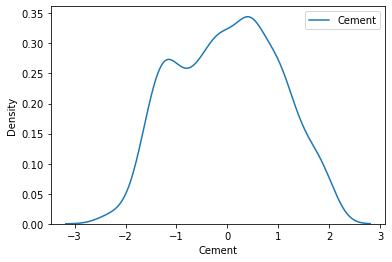

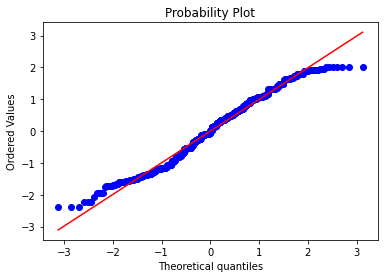

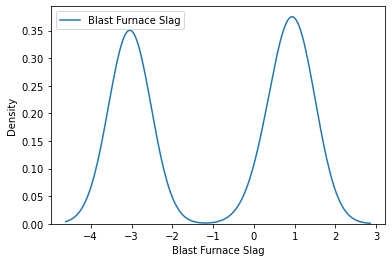

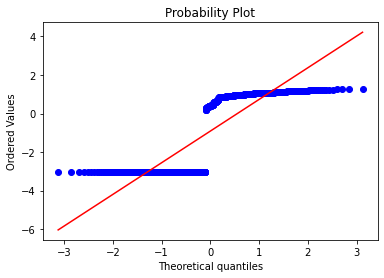

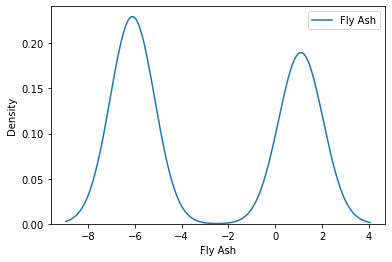

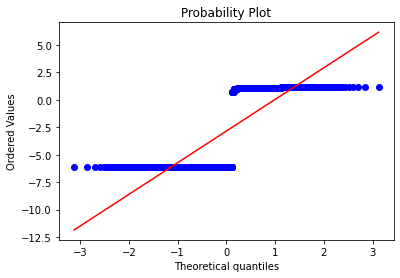

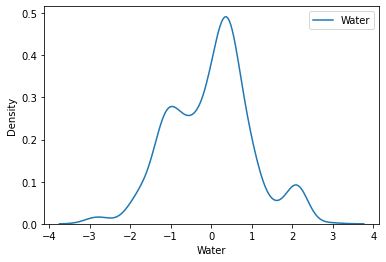

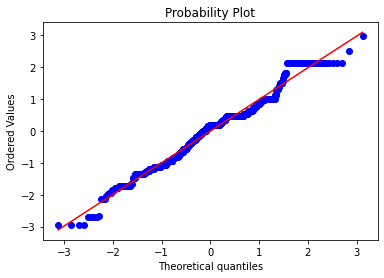

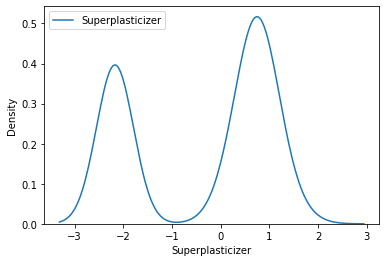

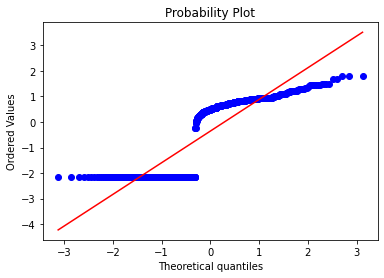

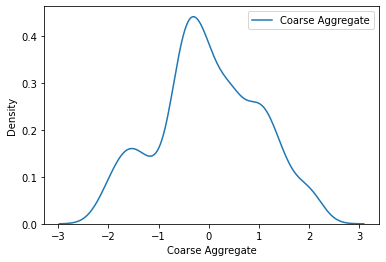

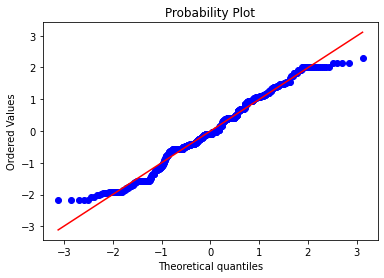

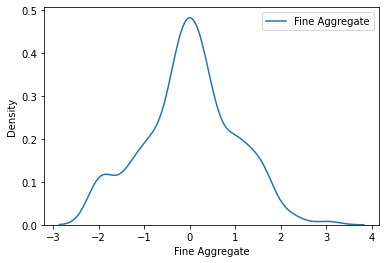

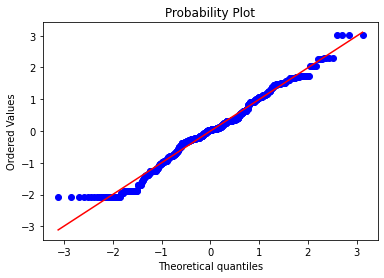

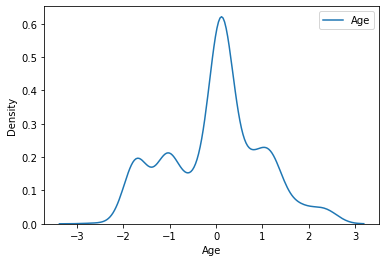

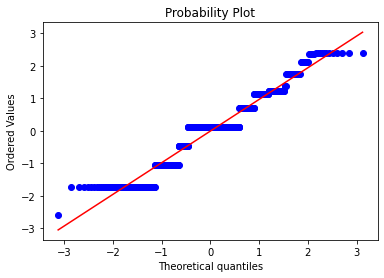

In [65]:
for col in X_train:
    sns.kdeplot(X_train[col],label=col)
    plt.legend()
    plt.show()
    stat.probplot(X_train[col],dist="norm",plot=plt)
    plt.show()

Blast Furnace Slag, Fly Ash, Superplasticizer, and has not the Normal Distribution

# Training After the PowerTransformer

In [66]:
lr=LinearRegression()

In [68]:
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred=lr.predict(X_test)

# Accuracy After the PowerTransformation training

In [70]:
r2_score(y_pred,y_test)

0.7403143580670326

In [71]:
cross_val_score(lr,X_train,y_train,cv=10).mean()

0.7844384546922362

In [72]:
mean_squared_error(y_test,y_pred)

59.91402828647811

### As we can see after watching the accuracy of the both data, then we can make a concept that result after the PowerTransformation become very good becuase all the column have the normal distribution.